# Лабораторная работа №1
# Рожковой Марии 15-АС
# Вариант 2

In [5]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df_flights = pd.read_csv('flights.csv',nrows = 40000)

In [4]:
df_flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_flights.tail()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
39995,2015,1,3,6,AA,1563,N426AA,TUL,DFW,1505,...,1646.0,26.0,0,0,NaN,0.0,0.0,0.0,26.0,0.0
39996,2015,1,3,6,AA,1544,N3LLAA,DFW,BOS,1505,...,1939.0,9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
39997,2015,1,3,6,AA,1510,N7BSAA,MIA,JFK,1505,...,2011.0,122.0,0,0,NaN,122.0,0.0,0.0,0.0,0.0
39998,2015,1,3,6,AS,633,N440AS,PHX,SEA,1505,...,1705.0,3.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
39999,2015,1,3,6,AS,641,N625AS,TUS,SEA,1505,...,1718.0,-1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 31 columns):
YEAR                   40000 non-null int64
MONTH                  40000 non-null int64
DAY                    40000 non-null int64
DAY_OF_WEEK            40000 non-null int64
AIRLINE                40000 non-null object
FLIGHT_NUMBER          40000 non-null int64
TAIL_NUMBER            39956 non-null object
ORIGIN_AIRPORT         40000 non-null object
DESTINATION_AIRPORT    40000 non-null object
SCHEDULED_DEPARTURE    40000 non-null int64
DEPARTURE_TIME         39098 non-null float64
DEPARTURE_DELAY        39098 non-null float64
TAXI_OUT               39084 non-null float64
WHEELS_OFF             39084 non-null float64
SCHEDULED_TIME         40000 non-null int64
ELAPSED_TIME           38995 non-null float64
AIR_TIME               38995 non-null float64
DISTANCE               40000 non-null int64
WHEELS_ON              39060 non-null float64
TAXI_IN                39060 non-null

In [7]:
df_flights.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,40000.0,40000.0,40000.000000,40000.000000,40000.000000,40000.000000,39098.000000,39098.000000,39084.000000,39084.000000,...,40000.000000,39060.000000,38995.000000,40000.000000,40000.000000,10779.000000,10779.000000,10779.000000,10779.000000,10779.000000
mean,2015.0,1.0,1.883975,4.883975,2238.008550,1269.948700,1284.279221,12.556320,16.112834,1306.985211,...,1454.932925,1446.121377,10.006950,0.002050,0.023075,11.198070,0.097968,17.767604,19.991279,1.817330
std,0.0,0.0,0.753676,0.753676,1824.239862,462.294582,474.419114,37.332642,8.699097,474.164346,...,476.558224,498.573300,39.971901,0.045231,0.150144,19.730688,2.050679,43.217756,38.593570,12.116461
min,2015.0,1.0,1.000000,4.000000,1.000000,5.000000,1.000000,-39.000000,1.000000,1.000000,...,2.000000,1.000000,-54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,1.0,1.000000,4.000000,760.000000,900.000000,909.000000,-4.000000,11.000000,925.000000,...,1105.000000,1101.000000,-10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.0,1.0,2.000000,5.000000,1680.000000,1230.000000,1246.000000,0.000000,14.000000,1258.000000,...,1437.000000,1440.000000,0.000000,0.000000,0.000000,4.000000,0.000000,5.000000,5.000000,0.000000
75%,2015.0,1.0,2.000000,5.000000,3367.250000,1625.000000,1639.000000,15.000000,19.000000,1651.000000,...,1825.000000,1830.000000,17.000000,0.000000,0.000000,17.000000,0.000000,19.000000,25.000000,0.000000
max,2015.0,1.0,3.000000,6.000000,7438.000000,2359.000000,2400.000000,1380.000000,176.000000,2400.000000,...,2359.000000,2400.000000,1384.000000,1.000000,1.000000,570.000000,107.000000,1380.000000,891.000000,453.000000


In [8]:
df_flights.dropna()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY


In [9]:
df_flights.drop_duplicates()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,...,610.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,...,509.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,...,753.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,...,532.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,...,656.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


1. Подсчитайте количество отменённых рейсов.

In [10]:
df_flights[df_flights['CANCELLED']==1].shape

(923, 31)

In [11]:
df_flights.shape

(40000, 31)

 2.Определите аэропорт, рейсы для которого отменяются наиболее часто.

In [12]:
cdf = df_flights[df_flights['CANCELLED']==1]
s = cdf.groupby('ORIGIN_AIRPORT')['CANCELLED'].value_counts()
s

ORIGIN_AIRPORT  CANCELLED
ABI             1            12
ABQ             1             1
ACT             1             3
AEX             1             1
AMA             1             9
ANC             1             1
APN             1             1
ASE             1             3
ATL             1            10
AUS             1             9
AZO             1             1
BHM             1             1
BIL             1             1
BMI             1             2
BNA             1             3
BOI             1             2
BOS             1             2
BRO             1             2
BTM             1             1
BTR             1            10
BUR             1             2
BWI             1             4
CAE             1             1
CHA             1             1
CHS             1             1
CID             1             9
CLE             1             1
CLL             1             2
CLT             1             6
CMH             1             1
              

In [13]:
s.idxmax()[0]

'DFW'

In [14]:
s[['DFW']]

ORIGIN_AIRPORT  CANCELLED
DFW             1            244
Name: CANCELLED, dtype: int64

3.Определите коэффициент корреляции Пирсона и Спирмена между отменой рейса и днём недели, месяцем, авиакомпанией, аэропортом. Оцените значение p-value. Постройте плотность распределения признаков. 

In [27]:
print(df_flights[['CANCELLED','DAY_OF_WEEK']].corr(method='pearson')) 
print(df_flights[['CANCELLED','DAY_OF_WEEK']].corr(method='spearman')) 
print('') 
print(df_flights[['CANCELLED','MONTH']].corr(method='pearson')) 
print(df_flights[['CANCELLED','MONTH']].corr(method='spearman')) 
print('') 

from sklearn.preprocessing import LabelEncoder 
lb_make = LabelEncoder() 
df_flights['AIRLINE'] = lb_make.fit_transform(df_flights['AIRLINE']) 
df_flights['ORIGIN_AIRPORT'] = lb_make.fit_transform(df_flights['ORIGIN_AIRPORT']) 

print(df_flights[['CANCELLED','AIRLINE']].corr(method='pearson')) 
print(df_flights[['CANCELLED','AIRLINE']].corr(method='spearman')) 
print('') 
print(df_flights[['CANCELLED','ORIGIN_AIRPORT']].corr(method='pearson')) 
print(df_flights[['CANCELLED','ORIGIN_AIRPORT']].corr(method='spearman'))

             CANCELLED  DAY_OF_WEEK
CANCELLED     1.000000    -0.035108
DAY_OF_WEEK  -0.035108     1.000000
             CANCELLED  DAY_OF_WEEK
CANCELLED     1.000000    -0.037133
DAY_OF_WEEK  -0.037133     1.000000

           CANCELLED  MONTH
CANCELLED        1.0    NaN
MONTH            NaN    NaN
           CANCELLED  MONTH
CANCELLED        1.0    NaN
MONTH            NaN    NaN

           CANCELLED   AIRLINE
CANCELLED   1.000000 -0.031932
AIRLINE    -0.031932  1.000000
           CANCELLED   AIRLINE
CANCELLED   1.000000 -0.036588
AIRLINE    -0.036588  1.000000

                CANCELLED  ORIGIN_AIRPORT
CANCELLED        1.000000       -0.036685
ORIGIN_AIRPORT  -0.036685        1.000000
                CANCELLED  ORIGIN_AIRPORT
CANCELLED        1.000000       -0.034331
ORIGIN_AIRPORT  -0.034331        1.000000


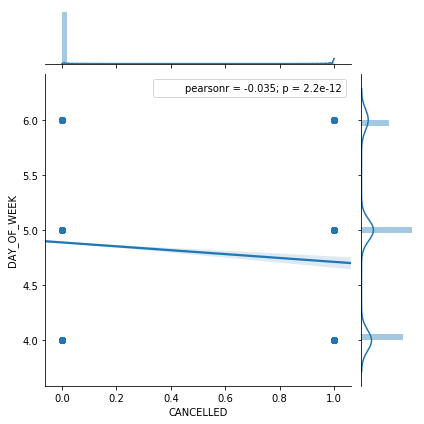

In [28]:
sns.jointplot(x='CANCELLED', y='DAY_OF_WEEK', data=df_flights, kind='reg'); 
plt.xlabel("CANCELLED"); 
plt.ylabel("DAY_OF_WEEK"); 
plt.show();

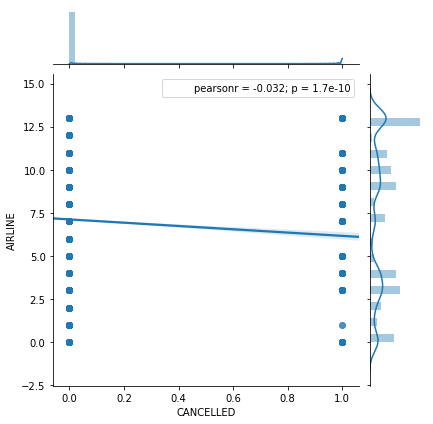

In [29]:
df_flights['AIRLINE'] = lb_make.fit_transform(df_flights['AIRLINE'])
sns.jointplot(x='CANCELLED', y='AIRLINE', data=df_flights, kind='reg'); 
plt.xlabel("CANCELLED"); 
plt.ylabel("AIRLINE"); 
plt.show();

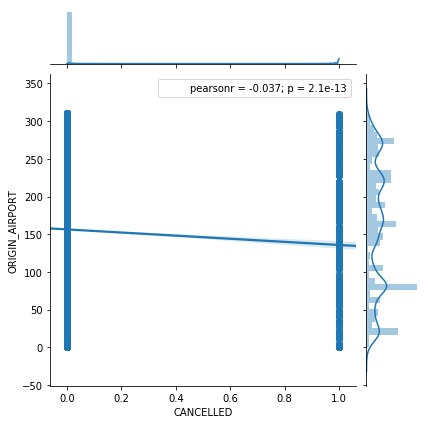

In [30]:
df_flights['ORIGIN_AIRPORT'] = lb_make.fit_transform(df_flights['ORIGIN_AIRPORT'])
sns.jointplot(x='CANCELLED', y='ORIGIN_AIRPORT', data=df_flights, kind='reg'); 
plt.xlabel("CANCELLED"); 
plt.ylabel("ORIGIN_AIRPORT"); 
plt.show();

4.Подсчитайте для трёх выбранных авиакомпаний: количество рейсов, количество отменённых рейсов, количество перенаправленных рейсов.

In [19]:
print('Для АА кол-во рейсов: ' + str(len(df_flights[(df_flights['AIRLINE'] == 'AA')])))
print('Кол-во отмененных рейсов: ' + str(len(df_flights[(df_flights['CANCELLED'] == 1) & (df_flights['AIRLINE'] == 'AA')])))
print('Кол-во перенаправленных рейсов: ' + str(len(df_flights[(df_flights['DIVERTED'] == 1) & (df_flights['AIRLINE'] == 'AA')])))
print('')
print('Для UA кол-во рейсов: ' + str(len(df_flights[(df_flights['AIRLINE'] == 'UA')])))
print('Кол-во отмененных рейсов: ' + str(len(df_flights[(df_flights['CANCELLED'] == 1) & (df_flights['AIRLINE'] == 'UA')])))
print('Кол-во перенаправленных рейсов: ' + str(len(df_flights[(df_flights['DIVERTED'] == 1) & (df_flights['AIRLINE'] == 'UA')])))
print('')
print('Для US кол-во рейсов: ' + str(len(df_flights[(df_flights['AIRLINE'] == 'US')])))
print('Кол-во отмененных рейсов: ' + str(len(df_flights[(df_flights['CANCELLED'] == 1) & (df_flights['AIRLINE'] == 'US')])))
print('Кол-во перенаправленных рейсов: ' + str(len(df_flights[(df_flights['DIVERTED'] == 1) & (df_flights['AIRLINE'] == 'US')])))

Для АА кол-во рейсов: 3921
Кол-во отмененных рейсов: 149
Кол-во перенаправленных рейсов: 3

Для UA кол-во рейсов: 3436
Кол-во отмененных рейсов: 21
Кол-во перенаправленных рейсов: 9

Для US кол-во рейсов: 2811
Кол-во отмененных рейсов: 13
Кол-во перенаправленных рейсов: 3


5.Определите скорость полёта для каждого рейса, среднюю скорость полёта для трех авиакомпаний.

In [45]:
print('Номер рейса Скорость полета для каждого рейса')

#V = 'DISTANCE'/ ('DEPARTURE_TIME' - 'ARRIVAL_TIME')
df_flights['speed'] = df_flights['DISTANCE'] / (df_flights['ARRIVAL_TIME'] - df_flights['DEPARTURE_TIME'])
print(df_flights['speed'])
print('')
print('Средняя скорость полета авиакомпаний')

df_flights['sred_speed'] = df_flights['speed'] / df_flights['AIRLINE']

print(df_flights['sred_speed'])

Номер рейса Скорость полета для каждого рейса
0        -0.744090
1         3.152909
2         2.895334
3         3.160594
4         6.161702
5         2.693220
6         2.651020
7         2.997179
8         2.853801
9         2.804173
10        2.794872
11        2.994490
12        2.692982
13        3.063584
14        2.700772
15        3.497585
16        3.447619
17        2.833622
18        3.344902
19        2.818182
20        2.692671
21        3.071026
22        2.470726
23        3.182065
24        2.932280
25        2.785859
26        3.500000
27        3.097917
28        2.975155
29        3.008803
           ...    
39970     3.049555
39971    -0.514894
39972     4.064000
39973     1.146853
39974     3.435897
39975   -45.666667
39976     4.437209
39977     3.525641
39978     1.668508
39979   -51.000000
39980    67.600000
39981     2.601732
39982     3.511811
39983     3.821918
39984     1.896552
39985     0.941725
39986     3.626728
39987     3.042781
39988     4.238356
3998

TypeError: unsupported operand type(s) for /: 'float' and 'str'

6.Визуализируйте тепловую карту частоты отмены рейсов. По одной оси – дни, по другой оси – рейс(по двум аэропортам).

In [7]:
df_airoports =  df_flights[(df_flights.ORIGIN_AIRPORT == 'ANC') & (df_flights.CANCELLED == 0) & (df_flights.FLIGHT_NUMBER < 125) ]
fnu = tuple(df_airoports['FLIGHT_NUMBER'].unique())
don = tuple(df_airoports['DAY_OF_WEEK'].unique())

fnu1 = tuple(df_airoports['FLIGHT_NUMBER'])
don1 = tuple(df_airoports['DAY_OF_WEEK'])

max(fnu)

122

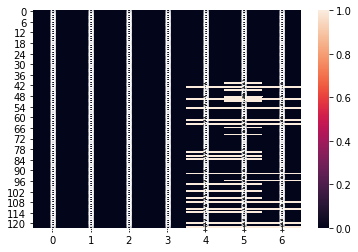

In [8]:
new_matrix = np.zeros([max(fnu)+1, max(don)+1])
np.add.at(new_matrix, (fnu1, don1), 1)
new_matrix = pd.DataFrame(new_matrix)
%matplotlib inline
sns.heatmap(new_matrix, annot=True)

7.Посчитайте и визуализируйте время задержки отправки и прибытия по трём аэропортам.

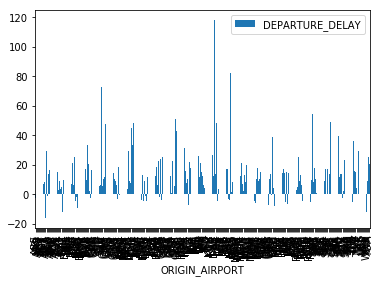

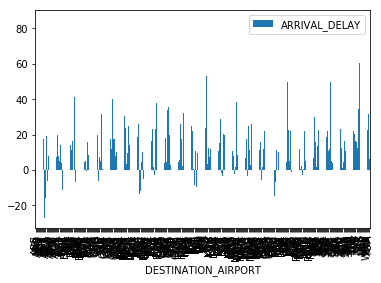

In [12]:
df_flights.groupby('ORIGIN_AIRPORT')['ORIGIN_AIRPORT','DEPARTURE_DELAY'].mean().dropna().plot(kind='bar') 
df_flights.groupby('DESTINATION_AIRPORT')['DESTINATION_AIRPORT','ARRIVAL_DELAY'].mean().dropna().plot(kind='bar') 
plt.show()


8.Определите для 3 выбранных аэропортов и визуализируйте задержки по каждой причине.

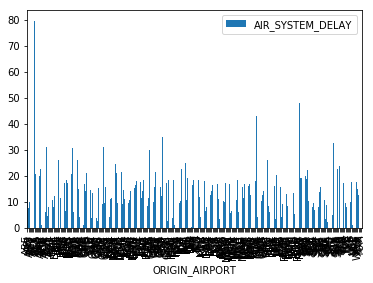

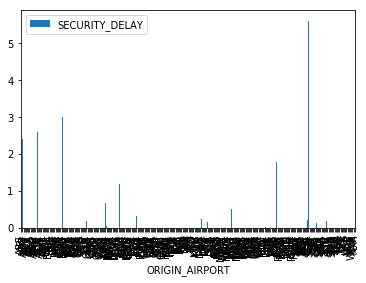

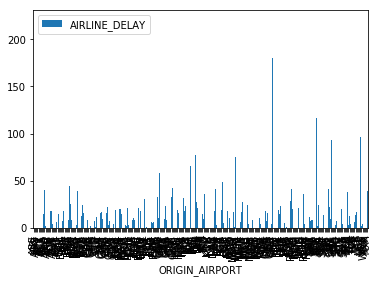

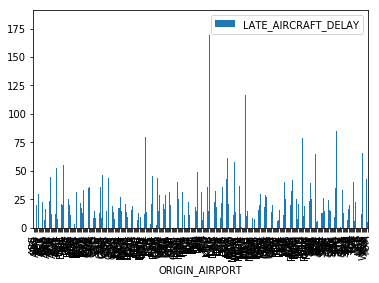

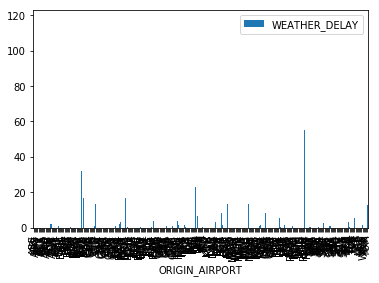

In [13]:
df_air = df_flights['AIR_SYSTEM_DELAY']
df_sec = df_flights['SECURITY_DELAY']
df_airl = df_flights['AIRLINE_DELAY']
df_late = df_flights['LATE_AIRCRAFT_DELAY']
df_weat = df_flights['WEATHER_DELAY']            

df_air = df_air.dropna().reset_index(drop=True)
df_sec = df_sec.dropna().reset_index(drop=True)
df_airl = df_airl.dropna().reset_index(drop=True)
df_late = df_late.dropna().reset_index(drop=True)
df_weat = df_weat.dropna().reset_index(drop=True)


df_flights.groupby('ORIGIN_AIRPORT')['ORIGIN_AIRPORT','AIR_SYSTEM_DELAY'].mean().dropna().plot(kind='bar') 
df_flights.groupby('ORIGIN_AIRPORT')['ORIGIN_AIRPORT','SECURITY_DELAY'].mean().dropna().plot(kind='bar')
df_flights.groupby('ORIGIN_AIRPORT')['ORIGIN_AIRPORT','AIRLINE_DELAY'].mean().dropna().plot(kind='bar')
df_flights.groupby('ORIGIN_AIRPORT')['ORIGIN_AIRPORT','LATE_AIRCRAFT_DELAY'].mean().dropna().plot(kind='bar')    
df_flights.groupby('ORIGIN_AIRPORT')['ORIGIN_AIRPORT','WEATHER_DELAY'].mean().dropna().plot(kind='bar')
plt.legend()
plt.show()

9.Определите авиакомпанию с максимальными задержками рейсов по отправке и прибытию.

In [25]:
airline_list = df_flights['AIRLINE'].unique()

print('Максимальные задержки рейсов по отправке')
delay_dict = {}
for airline in airline_list:
    delay = len(df_flights[(df_flights['DEPARTURE_DELAY'] == 1) & (df_flights['AIRLINE'] == airline)])
    print('airline', airline, '\t', delay)
    delay_dict[airline] = delay
print(' ')    
print('Максимальные задержки рейсов по прибытию')
delay_dict = {}
for airline in airline_list:
    delay = len(df_flights[(df_flights['ARRIVAL_DELAY'] == 1) & (df_flights['AIRLINE'] == airline)])
    print('airline', airline, '\t', delay)
    delay_dict[airline] = delay
    
df1 = df_flights.groupby('AIRLINE')['ARRIVAL_DELAY'].sum().sort_values()
print("Максимальные задержки рейсов по прибытию у авиакомпании " + str(df1.index[len(df1)-1]))
df1 = df_flights.groupby('AIRLINE')['DEPARTURE_DELAY'].sum().sort_values()
print("Максимальные задержки рейсов по отправке у авиакомпании " + str(df1.index[len(df1)-1]))


Максимальные задержки рейсов по отправке
airline AS 	 38
airline AA 	 94
airline US 	 89
airline DL 	 162
airline NK 	 12
airline UA 	 109
airline HA 	 17
airline B6 	 37
airline OO 	 83
airline EV 	 103
airline MQ 	 38
airline F9 	 8
airline WN 	 336
airline VX 	 15
 
Максимальные задержки рейсов по прибытию
airline AS 	 27
airline AA 	 64
airline US 	 54
airline DL 	 89
airline NK 	 11
airline UA 	 60
airline HA 	 23
airline B6 	 46
airline OO 	 82
airline EV 	 101
airline MQ 	 24
airline F9 	 11
airline WN 	 188
airline VX 	 15
Максимальные задержки рейсов по прибытию у авиакомпании WN
Максимальные задержки рейсов по отправке у авиакомпании WN
